In [50]:
!python -m pip install snap-stanford
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import random
import matplotlib.pyplot as plt
import csv
from io import StringIO
import pandas as pd
from urllib.request import urlopen
import numpy as np 
import numpy as np
import networkx as nx
import snap

#facebook ego data
fe_edges = 'https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges'
FE_edges =pd.read_csv(fe_edges,delimiter=" ",names = ["Node1", "Node2"], encoding = "ISO-8859-1")

fe_feat= 'https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.feat'
FE_feat = pd.read_csv(fe_feat, delimiter=" ", encoding = "ISO-8859-1",header = None)

>Creating Facebook graph




In [52]:
FB_G = nx.Graph()
V = np.unique(FE_edges.values.flatten())
FB_G.add_nodes_from(V)
E = FE_edges.values
for e1,e2 in E:
  FB_G.add_edge(int(e1), int(e2)) 


# **assigment 8 **

---

(a) The Sznajd model is a variant of spin model employing the theory of social impact, which takes into account the fact that a group of individuals with the same opinion can influence their neighbours more than one single individual. Please use the Sznajd model to simulate the cascade of misinformation based on Facebook-Ego datasets with different initial ”infected” numbers: 5, 15, and 30. Please visualize the results and output a prevalence plot. (May refer to NDlib.)

In [53]:
plt.close("all")

In [54]:
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

def Mol_Sznajd(G, n):

  # Generating n random nodes to use as initial infected nodes
  connect_com = list(max(nx.connected_components(G), key=len))
  np.random.seed(123)
  infected_nodes = np.random.choice(connect_com, n, replace=False)

  # Model selection
  model = op.SznajdModel(G)

  # Model Configuration
  config = mc.Configuration()
  config.add_model_initial_configuration("Infected", infected_nodes)

  model.set_initial_status(config)

  # Simulation execution
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  # Visualization
  viz1 = DiffusionTrend(model, trends)
  viz1.plot("diffusion.png")

  # Prevalence plot
  viz2 = DiffusionPrevalence(model, trends)
  viz2.plot("prevalence.png")

In [55]:
Mol_Sznajd(FB_G, 5)

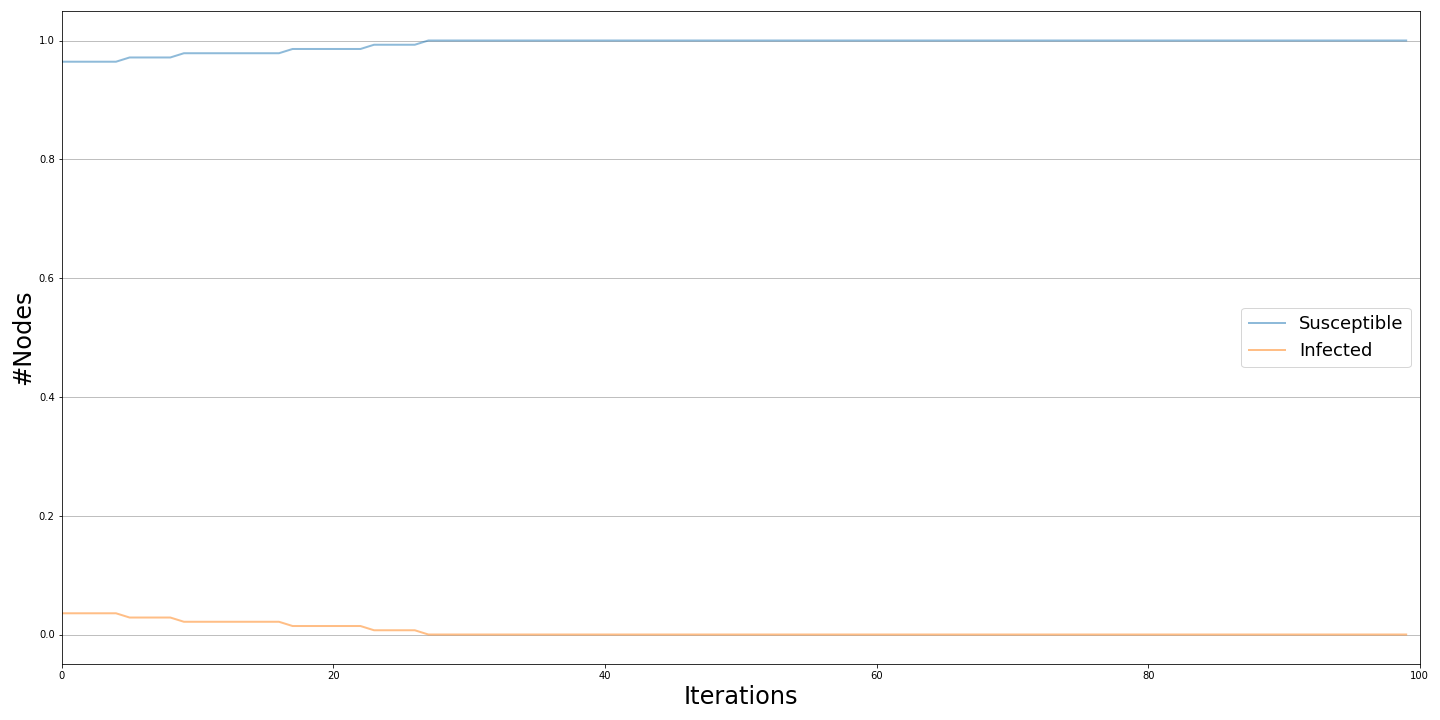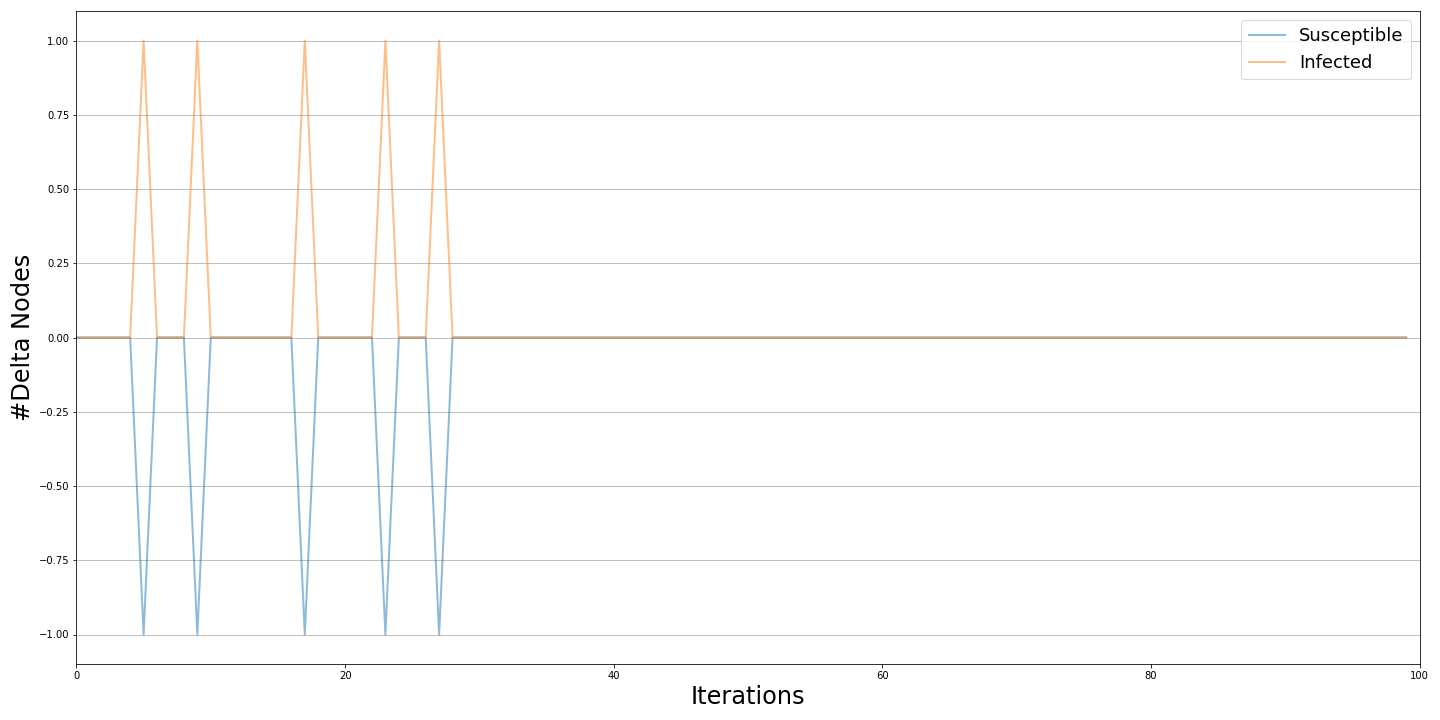

In [56]:
Mol_Sznajd(FB_G, 15)

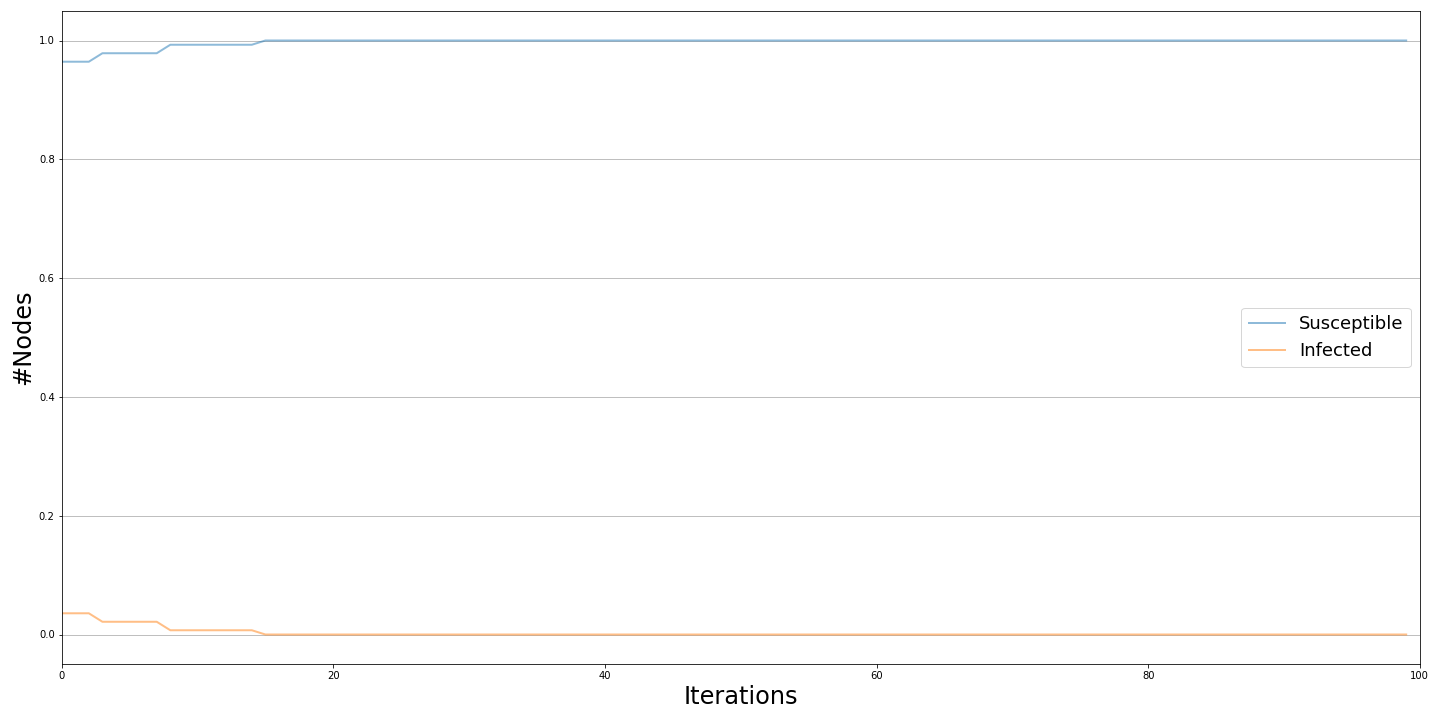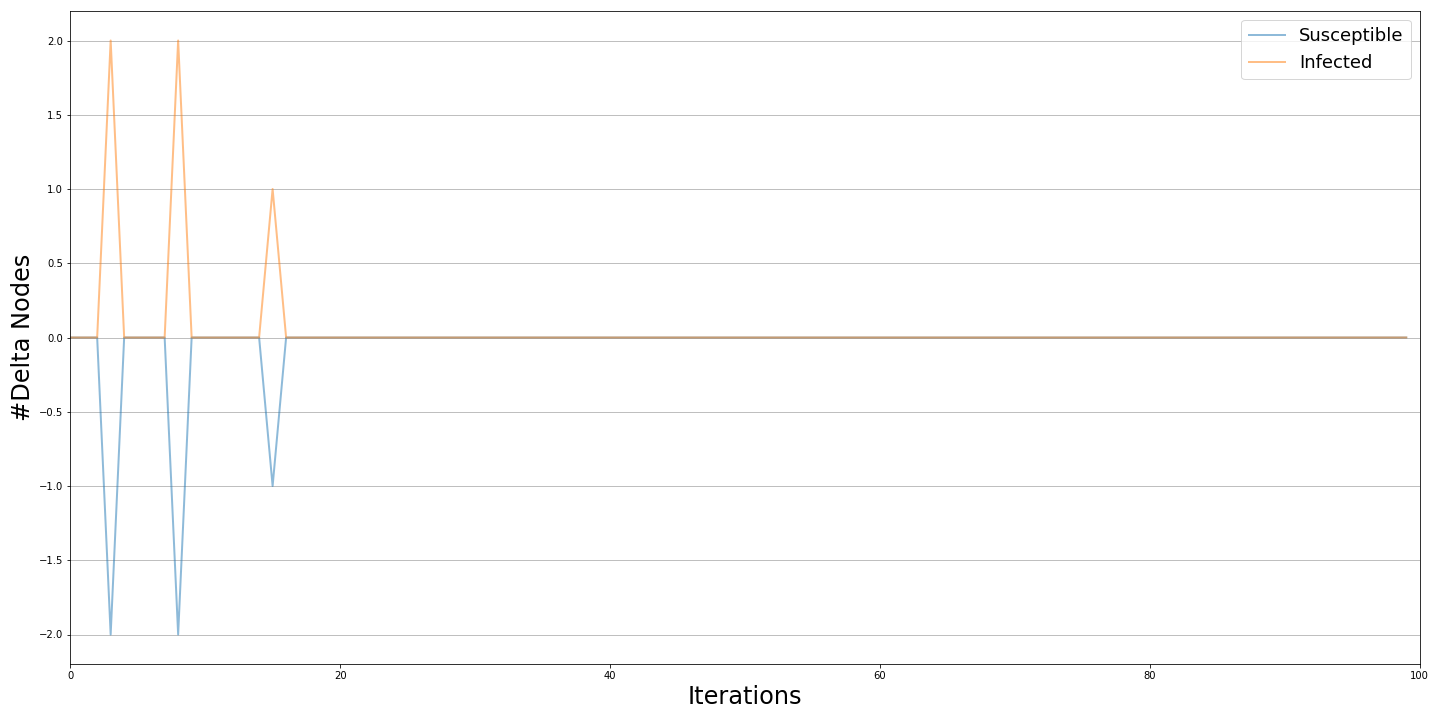

In [57]:
Mol_Sznajd(FB_G, 30)

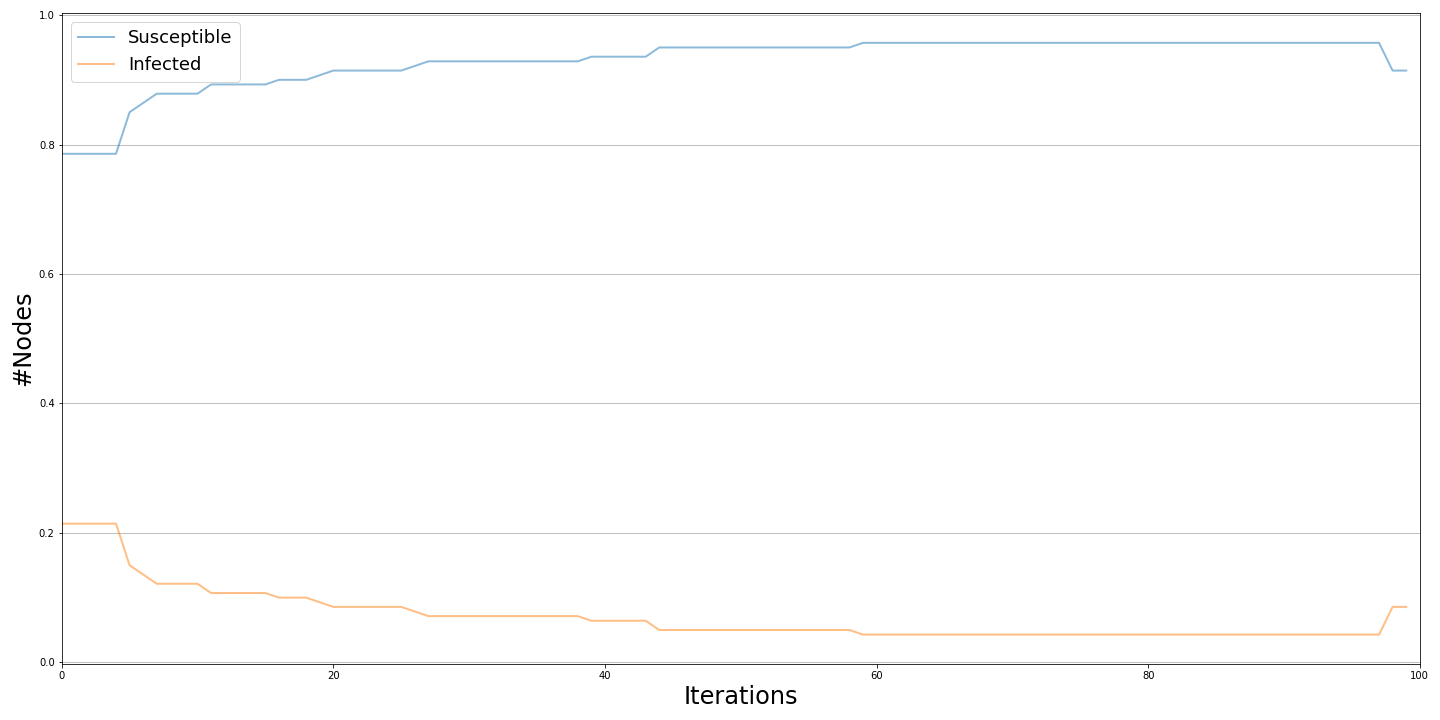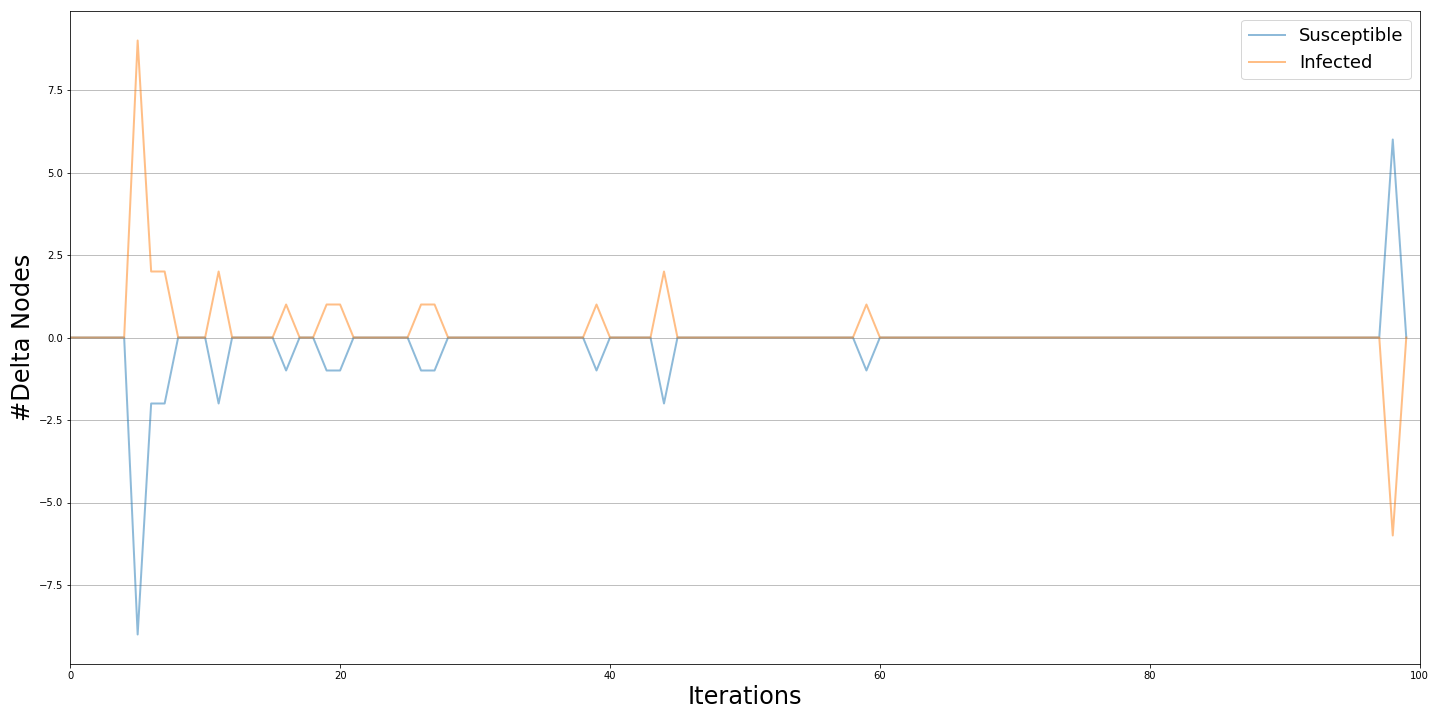

(b) Although the interaction networks in real-life are different from the social networks we have, it
is still meaningful to simulate the epidemics cascade with our datasets.
The SIR model was introduced in 1927 by Kermack. In this model, during the course of an
epidemics, a node is allowed to change its status from Susceptible (S) to Infected (I), then to
Removed (R). Please use the SIR model to simulate the cascade of epidemic with the following
three sets of infection/removal probabilities: (0.5, 0.2), (0.3, 0.3), (0.4, 0.5) on Facebook-Ego
dataset, and visualize the results.

In [58]:
import ndlib.models.epidemics as ep

def Mol_SIR(G, n, beta, gamma):

  # Generating n random nodes to use as initial infected nodes
  connect_com = list(max(nx.connected_components(G), key=len))
  np.random.seed(123)
  infected_nodes = np.random.choice(connect_com , n, replace=False)

  # Model selection
  model = ep.SIRModel(G)

  # Model Configuration
  cfg = mc.Configuration()
  cfg.add_model_parameter('beta', beta)
  cfg.add_model_parameter('gamma', gamma) 
  cfg.add_model_initial_configuration("Infected", infected_nodes)
  model.set_initial_status(cfg)

  # Simulation execution
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  # Visualization
  viz1 = DiffusionTrend(model, trends)
  viz1.plot("diffusion.png")

  # Prevalence plot
  viz2 = DiffusionPrevalence(model, trends)
  viz2.plot("prevalence.png")

In [59]:
Mol_SIR(FB_G, 5, 0.5, 0.2)

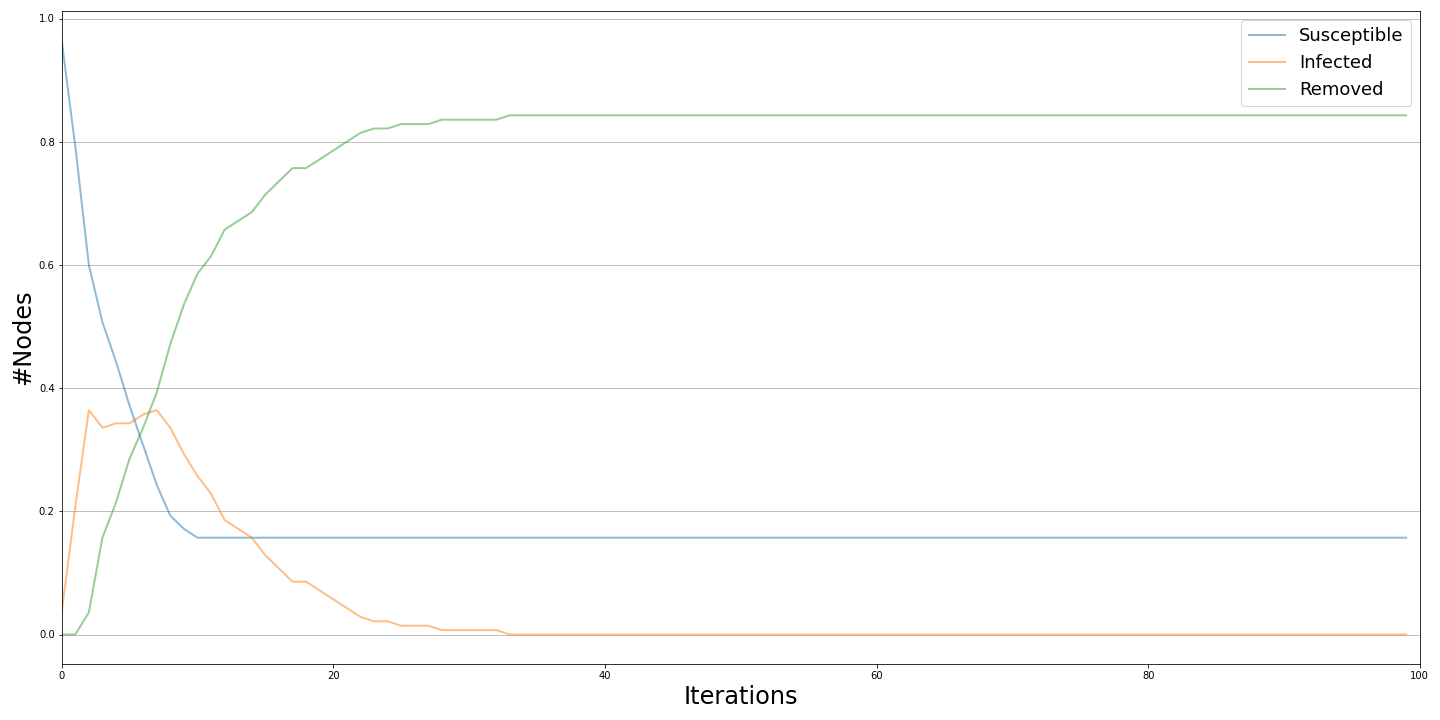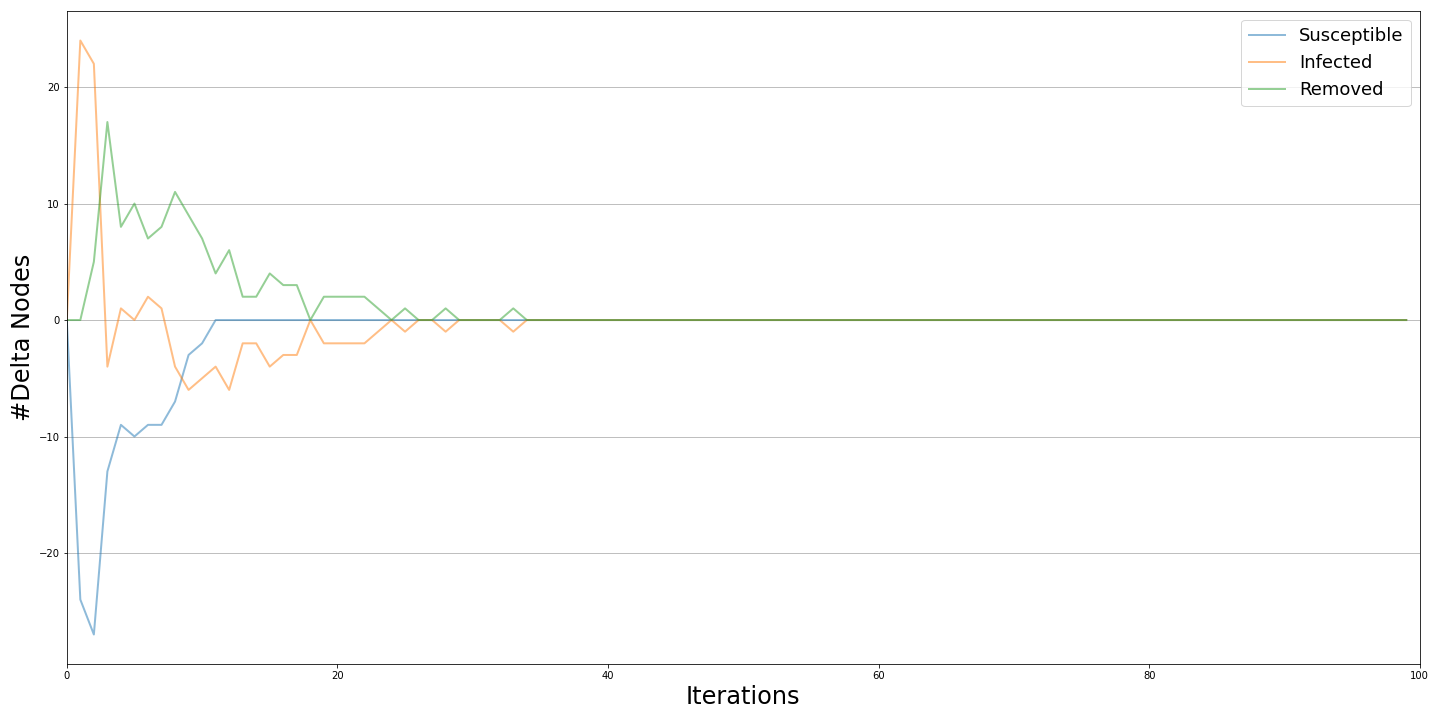

In [60]:
Mol_SIR(FB_G, 15, 0.3, 0.3)

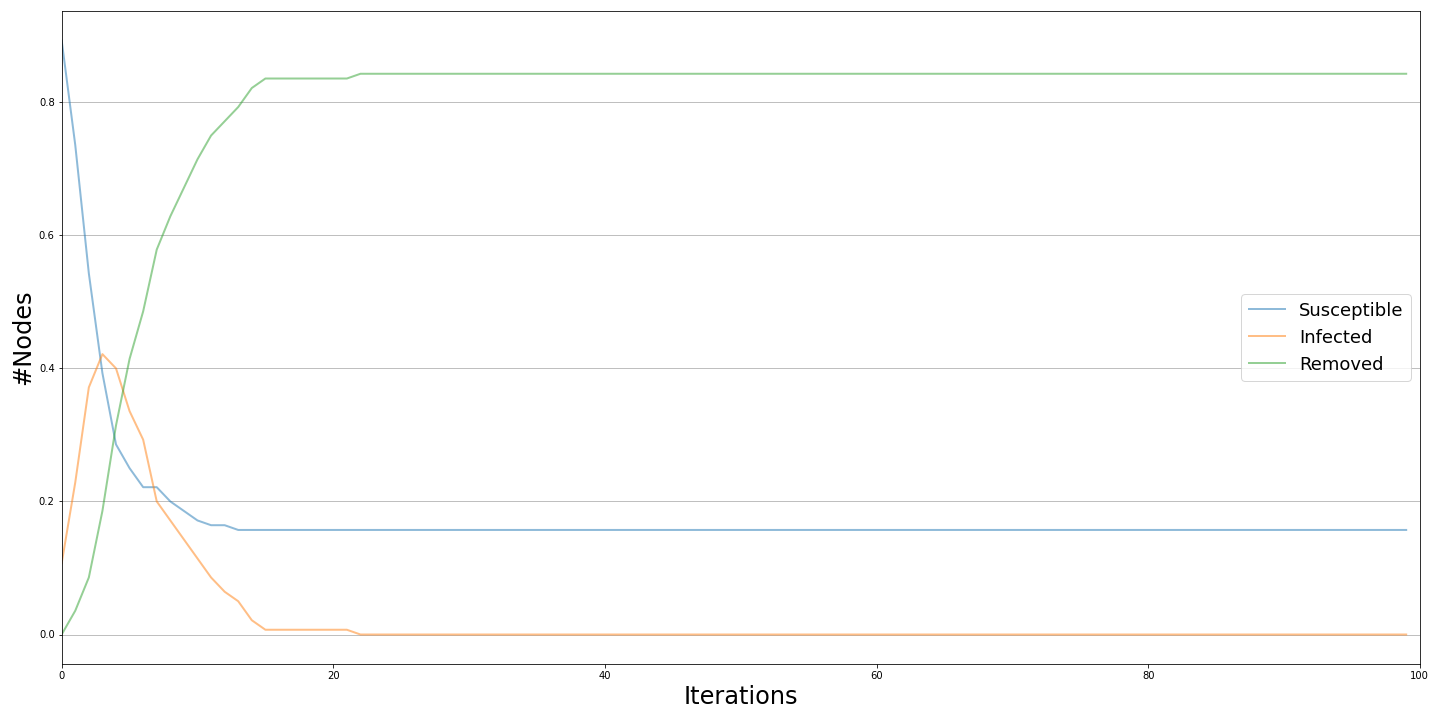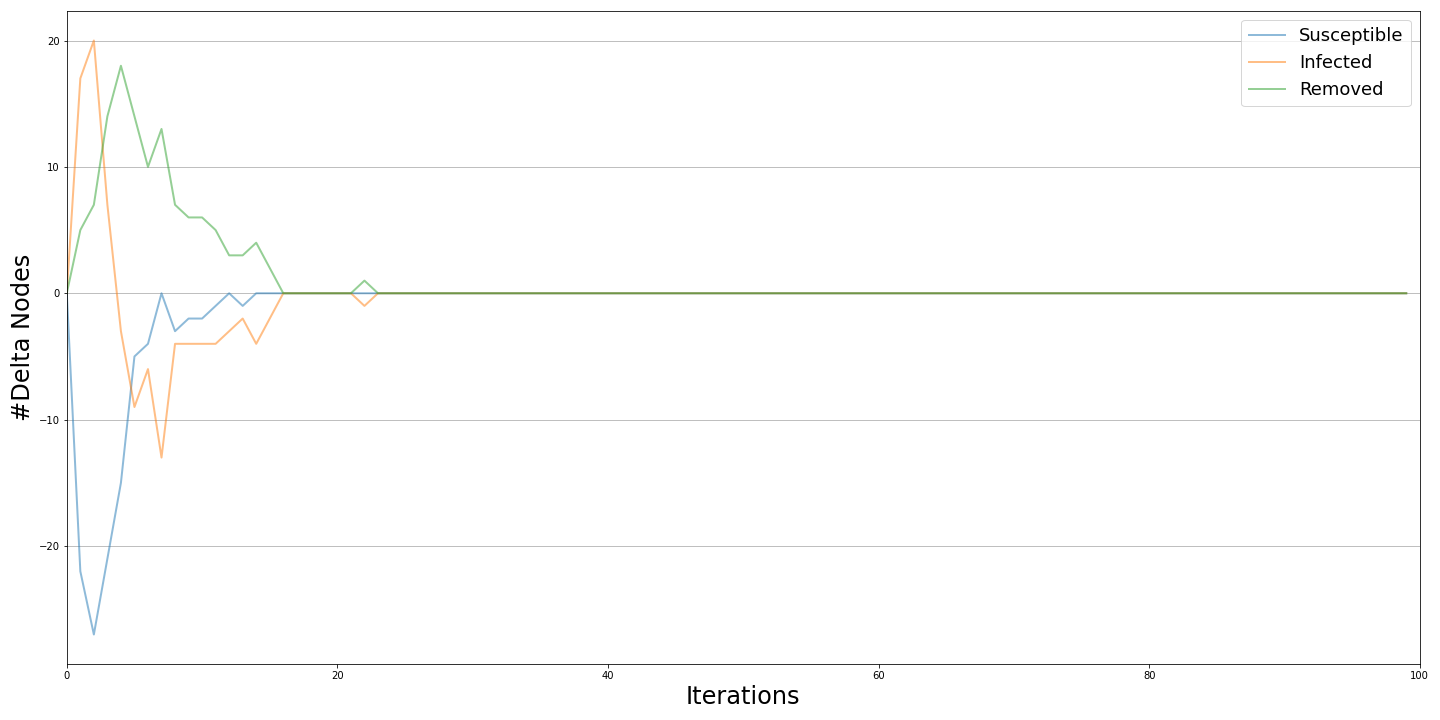

In [61]:
Mol_SIR(FB_G, 30, 0.4, 0.5)

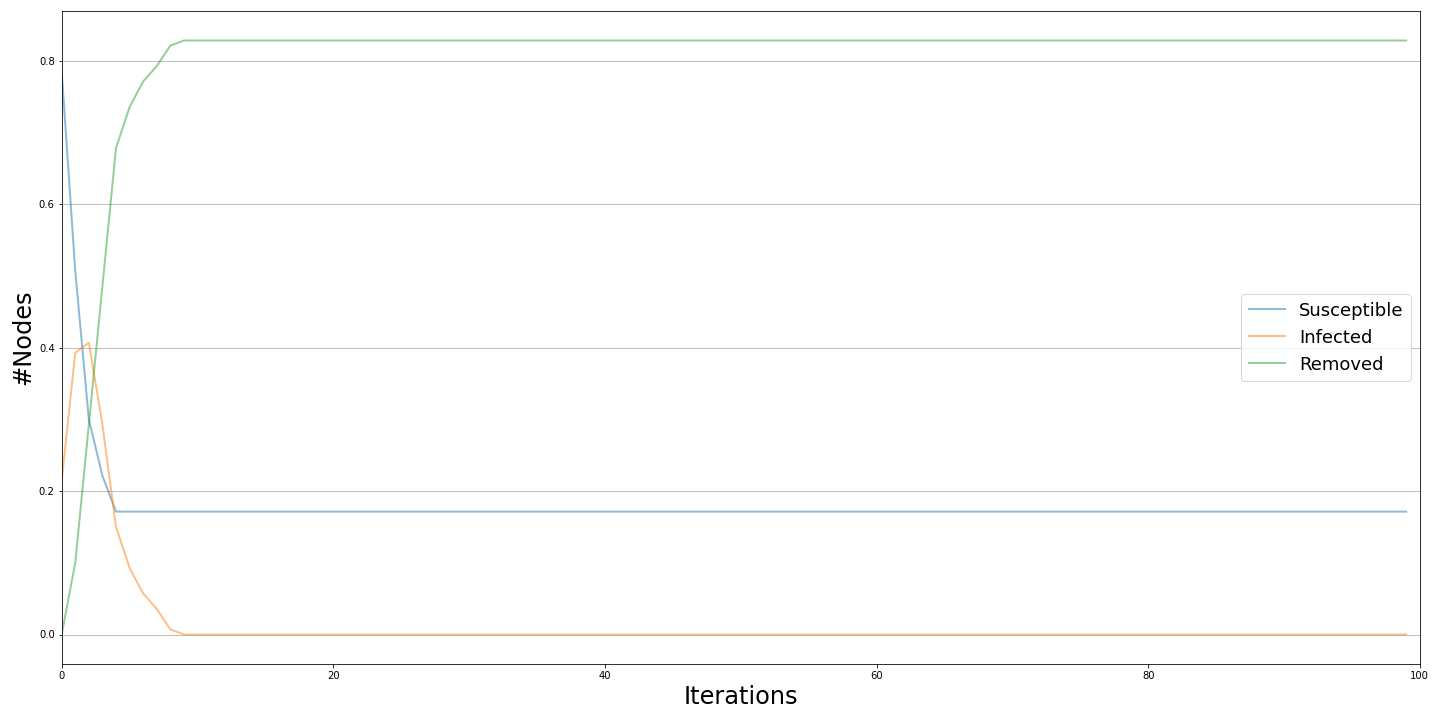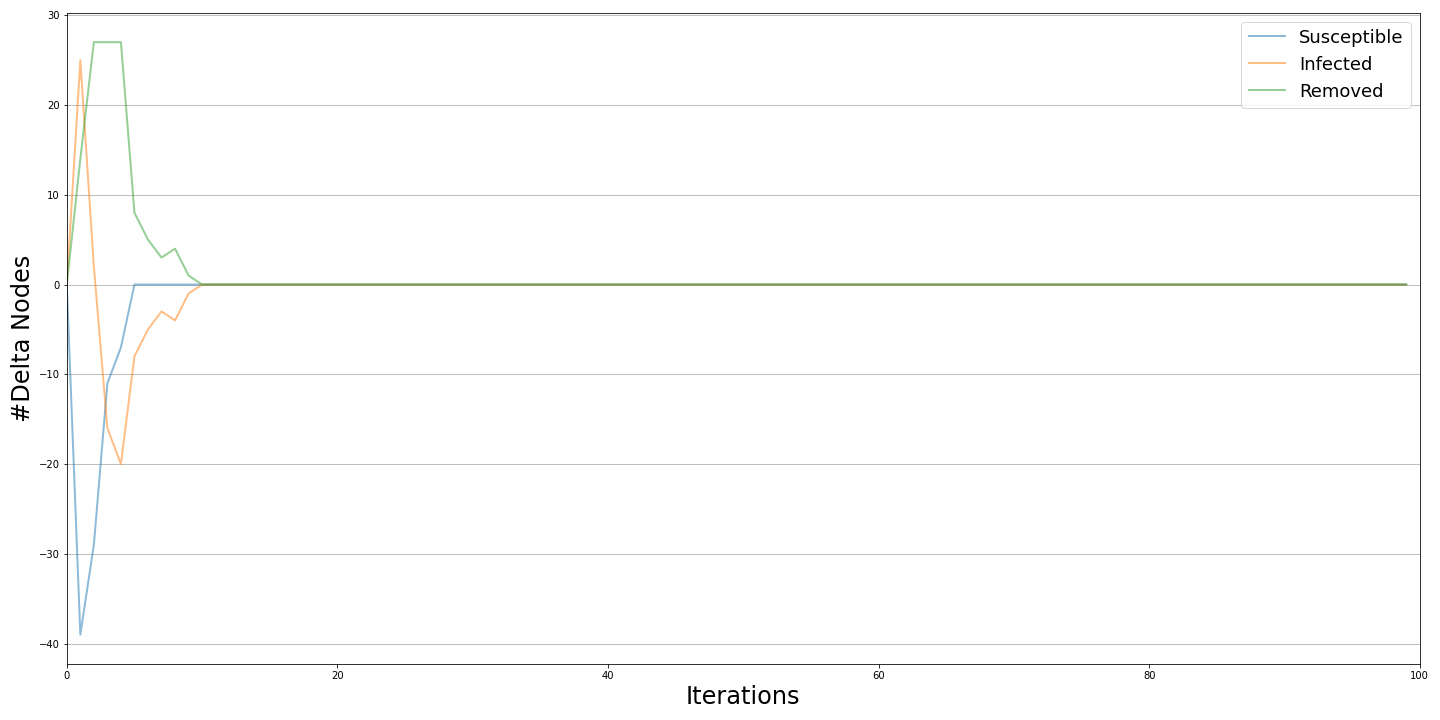